In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [3]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers

In [ ]:
api_key=NXH5HGAEGVNRINMT

In [8]:
history_points = 50

In [30]:
data = pd.read_csv("daily_IBM.csv")
data = data.drop("timestamp", axis=1)
data = data.drop(0, axis=0)
data.head()

,open,high,low,close,volume
1,96.75,96.81,93.69,94.81,11105400
2,95.87,95.94,93.50,94.37,10369100
3,94.44,94.44,90.00,91.56,16697600
4,92.75,92.94,90.19,90.25,13737600
5,90.50,93.94,90.50,93.94,8522300


In [ ]:
scaler = MinMaxScaler()
data_normalised = scaler.fit_transform(data)
data[['open', 'high','low','close','volume']] = scaler.fit_transform(data[['open', 'high','low','close','volume']])
data.head()

In [4]:
d1 = [ [11,26,36,48,30],[1,2,3,4,10], [21,24,36,47,100], [6,26,13,44,20],[17,72,83,48,200],[11,26,36,48,30]] 
data = pd.DataFrame(d1, columns = ['open', 'high','low','close','volume']) 

In [31]:
data

,open,high,low,close,volume
1,96.75,96.81,93.69,94.81,11105400
2,95.87,95.94,93.50,94.37,10369100
3,94.44,94.44,90.00,91.56,16697600
4,92.75,92.94,90.19,90.25,13737600
5,90.50,93.94,90.50,93.94,8522300
...,...,...,...,...,...
5291,116.69,118.17,116.25,117.91,5622756
5292,118.12,118.35,116.22,117.20,4289601
5293,115.63,116.37,113.48,114.50,6500799
5294,115.19,117.37,115.01,116.85,4683512


In [32]:
scaler = MinMaxScaler()
data_normalised = scaler.fit_transform(data)

In [33]:
data_normalised

array([[0.26192994, 0.25194724, 0.24755131, 0.24724694, 0.26606611],
       [0.25645492, 0.24648241, 0.24636596, 0.24450943, 0.2481139 ],
       [0.24755802, 0.2370603 , 0.22453054, 0.22702669, 0.40241315],
       ...,
       [0.37939401, 0.37481156, 0.37101504, 0.36975051, 0.15379835],
       [0.3766565 , 0.38109296, 0.38056023, 0.38437131, 0.1094899 ],
       [0.39600572, 0.38850503, 0.39372388, 0.39376594, 0.12435961]])

In [34]:
history_points = 3

In [35]:
ohlcv_histories_normalised = np.array([data_normalised[i  : i + history_points].copy() for i in range(len(data_normalised) - history_points)])

In [36]:
ohlcv_histories_normalised

array([[[0.26192994, 0.25194724, 0.24755131, 0.24724694, 0.26606611],
        [0.25645492, 0.24648241, 0.24636596, 0.24450943, 0.2481139 ],
        [0.24755802, 0.2370603 , 0.22453054, 0.22702669, 0.40241315]],

       [[0.25645492, 0.24648241, 0.24636596, 0.24450943, 0.2481139 ],
        [0.24755802, 0.2370603 , 0.22453054, 0.22702669, 0.40241315],
        [0.23704349, 0.22763819, 0.22571589, 0.21887638, 0.33024348]],

       [[0.24755802, 0.2370603 , 0.22453054, 0.22702669, 0.40241315],
        [0.23704349, 0.22763819, 0.22571589, 0.21887638, 0.33024348],
        [0.22304486, 0.2339196 , 0.22764988, 0.24183413, 0.20308588]],

       ...,

       [[0.39339265, 0.3959799 , 0.38218229, 0.37615878, 0.21454164],
        [0.38598893, 0.38611809, 0.38829621, 0.39096622, 0.13239022],
        [0.39488583, 0.38724874, 0.38810905, 0.38654887, 0.09988571]],

       [[0.38598893, 0.38611809, 0.38829621, 0.39096622, 0.13239022],
        [0.39488583, 0.38724874, 0.38810905, 0.38654887, 0.09988571],

In [37]:
next_day_open_values_normalised = np.array([data_normalised[:,0][i + history_points].copy() for i in range(len(data_normalised) - history_points)])

In [38]:
next_day_open_values_normalised

array([0.23704349, 0.22304486, 0.25141542, ..., 0.37939401, 0.3766565 ,
       0.39600572])

In [39]:
next_day_open_values_normalised = np.expand_dims(next_day_open_values_normalised, -1)

In [40]:
next_day_open_values_normalised

array([[0.23704349],
       [0.22304486],
       [0.25141542],
       ...,
       [0.37939401],
       [0.3766565 ],
       [0.39600572]])

In [41]:
next_day_open_values = np.array([data.iloc[:,0][i + history_points].copy() for i in range(len(data) - history_points)])

In [42]:
next_day_open_values

array([ 94.44,  92.75,  90.5 , ..., 118.12, 115.63, 115.19])

In [43]:
next_day_open_values = np.expand_dims(next_day_open_values, -1)

In [44]:
next_day_open_values

array([[ 94.44],
       [ 92.75],
       [ 90.5 ],
       ...,
       [118.12],
       [115.63],
       [115.19]])

In [45]:
y_normaliser = MinMaxScaler()
y_normaliser.fit(next_day_open_values)

MinMaxScaler()

In [46]:
assert ohlcv_histories_normalised.shape[0] == next_day_open_values_normalised.shape[0]

In [47]:
ohlcv_histories, next_day_open_values, unscaled_y, =ohlcv_histories_normalised, next_day_open_values_normalised, next_day_open_values

In [48]:
test_split = 0.9 # the percent of data to be used for testing
n = int(ohlcv_histories.shape[0] * test_split)

# splitting the dataset up into train and test sets

ohlcv_train = ohlcv_histories[:n]
y_train = next_day_open_values[:n]

ohlcv_test = ohlcv_histories[n:]
y_test = next_day_open_values[n:]

unscaled_y_test = unscaled_y[n:]

In [49]:
import numpy as np
np.random.seed(4)

lstm_input = Input(shape=(history_points, 5), name='lstm_input')
x = LSTM(50, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
x = Dense(64, name='dense_0')(x)
x = Activation('sigmoid', name='sigmoid_0')(x)
x = Dense(1, name='dense_1')(x)
output = Activation('linear', name='linear_output')(x)
model = Model(inputs=lstm_input, outputs=output)

adam = optimizers.Adam(lr=0.0005)

model.compile(optimizer=adam, loss='mse')


In [56]:
len(next_day_open_values)

5292

In [50]:
model.fit(x=ohlcv_train, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.1)
evaluation = model.evaluate(ohlcv_test, y_test)
print(evaluation)

Epoch 1/50
134/134 [==============================] - 2s 18ms/step - loss: 0.0328 - val_loss: 2.4256e-04
Epoch 2/50
134/134 [==============================] - 1s 9ms/step - loss: 0.0016 - val_loss: 3.6166e-04
Epoch 3/50
134/134 [==============================] - 1s 10ms/step - loss: 0.0014 - val_loss: 2.3404e-04
Epoch 4/50
134/134 [==============================] - 2s 12ms/step - loss: 0.0011 - val_loss: 2.9579e-04
Epoch 5/50
134/134 [==============================] - 2s 12ms/step - loss: 0.0010 - val_loss: 2.2842e-04
Epoch 6/50
134/134 [==============================] - 2s 12ms/step - loss: 8.7441e-04 - val_loss: 1.5409e-04
Epoch 7/50
134/134 [==============================] - 2s 12ms/step - loss: 8.1743e-04 - val_loss: 1.6286e-04
Epoch 8/50
134/134 [==============================] - 2s 12ms/step - loss: 7.7744e-04 - val_loss: 1.7425e-04
Epoch 9/50
134/134 [==============================] - 2s 12ms/step - loss: 6.6789e-04 - val_loss: 1.7100e-04
Epoch 10/50
134/134 [===================

KeyboardInterrupt: 

In [51]:
y_test_predicted = model.predict(ohlcv_test)
# model.predict returns normalised values
# now we scale them back up using the y_scaler from before
y_test_predicted = y_normaliser.inverse_transform(y_test_predicted)

# also getting predictions for the entire dataset, just to see how it performs
y_predicted = model.predict(ohlcv_histories)
y_predicted = y_normaliser.inverse_transform(y_predicted)

assert unscaled_y_test.shape == y_test_predicted.shape
real_mse = np.mean(np.square(unscaled_y_test - y_test_predicted))
scaled_mse = real_mse / (np.max(unscaled_y_test) - np.min(unscaled_y_test)) * 100
print(scaled_mse)

7.646222290105334


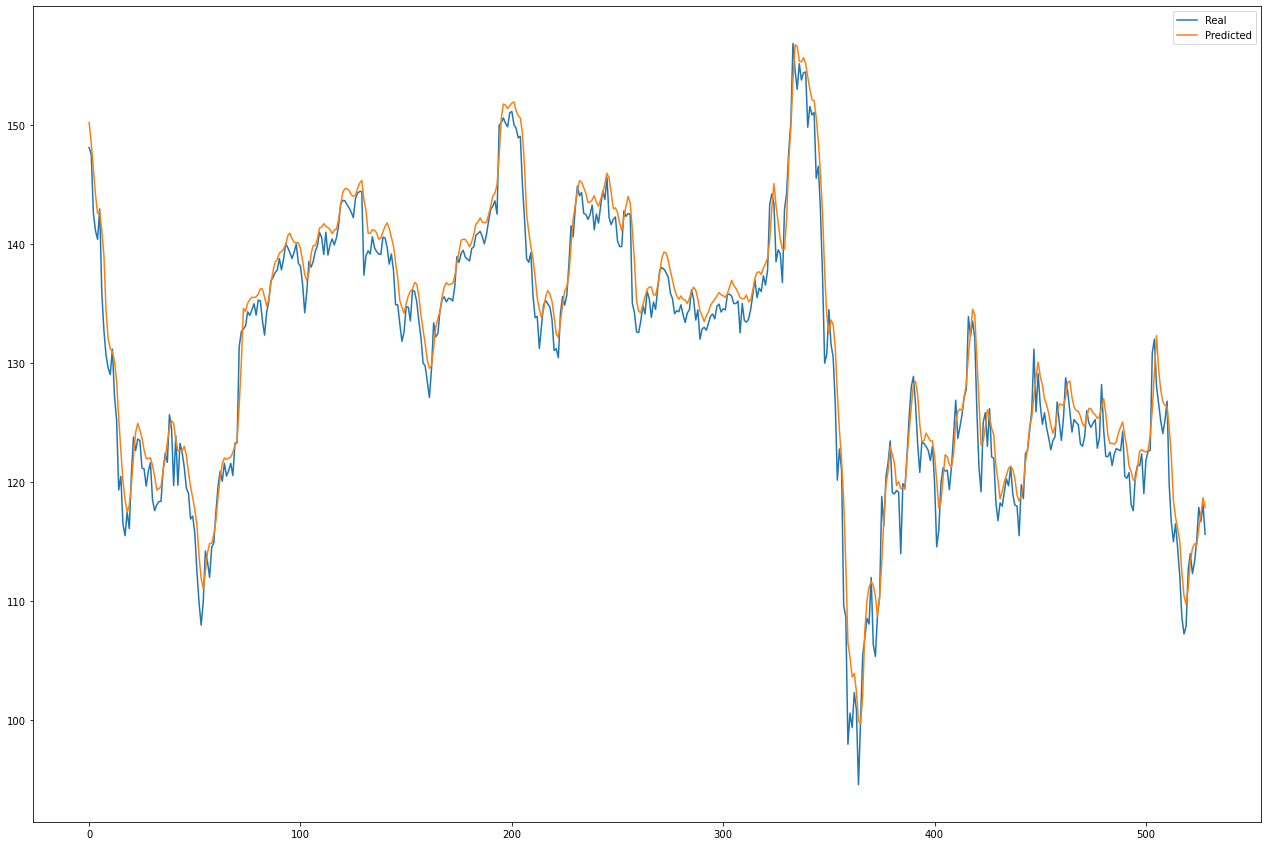

In [53]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(22, 15, forward=True)

start = 0
end = -1

real = plt.plot(unscaled_y_test[start:end], label='real')
pred = plt.plot(y_test_predicted[start:end], label='predicted')

plt.legend(['Real', 'Predicted'])

plt.show()